In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """生成y = xw + b +噪声"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape(-1, 1)

In [3]:
true_w = torch.tensor([2 ,-3, 4],dtype=torch.float)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print("features", features[0],'\nlabels', labels[0])

features tensor([-1.8199,  0.8138, -1.3984]) 
labels tensor([-7.4491])


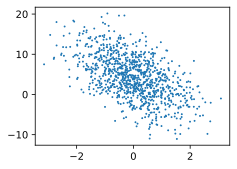

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(),1 )

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = torch.randperm(num_examples)
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:i+batch_size])